**Read the .csv file**

In [1]:
# Read the .csv file
def read_csv(filename):
    with open(filename, 'r') as f:
        data = f.read().split('\n')[1:]  # Read from the 2nd line
        data = [line.split(',') for line in data if line]
        data = [[float(num) for num in line] for line in data]
    return list(zip(*data))  # Separate x, y to access each

**Compute mean and sample variance**

In [2]:
# Calculate sample mean
def mean(data):
    return sum(data) / len(data)


# Calculate sample variance
def variance(data):
    m = mean(data)
    return sum((xi - m) ** 2 for xi in data) / (len(data) - 1)  
    # Remind that we use sample variance here

In [3]:
D = read_csv('../D.csv')
D_x_mean = mean(D[0])
D_x_variance = variance(D[0])
D_y_mean = mean(D[1])
D_y_variance = variance(D[1])

S = read_csv('../S.csv')
S_x_mean = mean(S[0])
S_x_variance = variance(S[0])
S_y_mean = mean(S[1])
S_y_variance = variance(S[1])

In [4]:
# Print out the results
print(f"D Dataset: x_mean = {D_x_mean:.2f}, x_variance = {D_x_variance:.2f}; \
y_mean = {D_y_mean:.2f}, y_variance = {D_y_variance:.2f} \n")
 
print(f"S Dataset: x_mean = {S_x_mean:.2f}, x_variance = {S_x_variance:.2f}; \
y_mean = {S_y_mean:.2f}, y_variance = {S_y_variance:.2f}")

D Dataset: x_mean = 54.26, x_variance = 281.07; y_mean = 47.83, y_variance = 725.52 

S Dataset: x_mean = 54.27, x_variance = 281.20; y_mean = 47.84, y_variance = 725.24


**Compute regression parametres:** $y = \beta(x-\bar{x}) + \alpha $

In [5]:
# Calculate regression parameters
def compute_regression_parameters(x_data, y_data):
    x_mean = mean(x_data)
    y_mean = mean(y_data)

    # Compute beta (slope)
    s_xy = sum((xi - x_mean) * (yi - y_mean) for xi, yi in zip(x_data, y_data))
    s_xx = sum((xi - x_mean) ** 2 for xi in x_data)
    beta = s_xy / s_xx

    # Compute alpha (intercept)
    alpha = y_mean

    return alpha, beta

In [6]:
D_alpha, D_beta = compute_regression_parameters(D[0], D[1])
S_alpha, S_beta = compute_regression_parameters(S[0], S[1])

# Print out the results
print(f"D Dataset: alpha = {D_alpha:.2f}, beta = {D_beta:.2f}")
print(f"S Dataset: alpha = {S_alpha:.2f}, beta = {S_beta:.2f}")

D Dataset: alpha = 47.83, beta = -0.10
S Dataset: alpha = 47.84, beta = -0.10


**Construct scatterplots**

In [7]:
# Construct scatter plots
import matplotlib.pyplot as plt
def plot_scatter(x_data, y_data, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(x_data, y_data)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

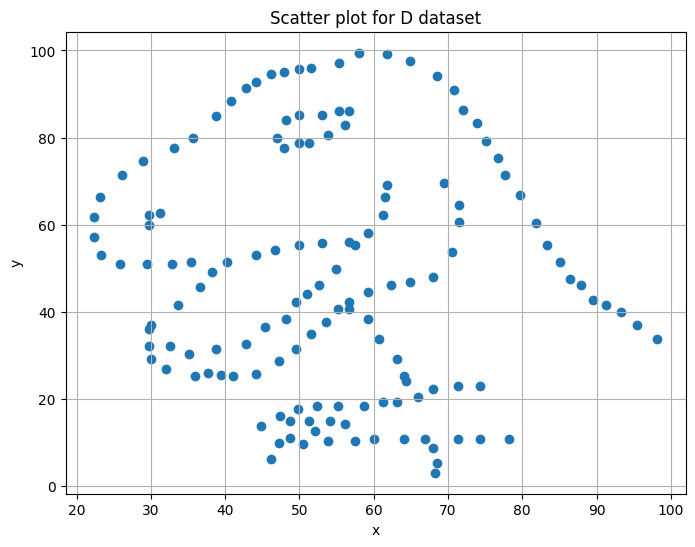

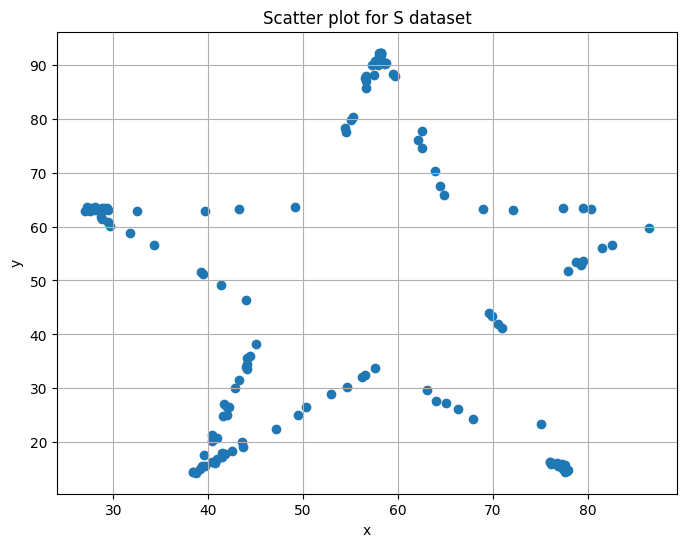

In [8]:
plot_scatter(D[0], D[1], 'Scatter plot for D dataset')
plot_scatter(S[0], S[1], 'Scatter plot for S dataset')

**Construct Confidence Interval**

In [9]:
from math import sqrt
# Compute stadard error of CI
def compute_standard_errors(x_data, y_data, alpha, beta):
    n = len(x_data)
    x_mean = sum(x_data) / n
    y_pred = [alpha + beta * (xi - x_mean) for xi in x_data]

    # Compute standard error for beta
    s_xx = sum((xi - x_mean) ** 2 for xi in x_data)
    var = sum((yi - y_hat) ** 2 / (n-2) for yi, y_hat in zip(y_data, y_pred))
    SE_beta = sqrt(var / s_xx)

    # Compute standard error for alpha
    SE_alpha = sqrt(var / n)

    return SE_alpha, SE_beta

In [10]:
D_SE_alpha, D_SE_beta = compute_standard_errors(D[0], D[1], D_alpha, D_beta)
S_SE_alpha, S_SE_beta = compute_standard_errors(S[0], S[1], S_alpha, S_beta)

In [11]:
# Compute the 95% confidence intervals
Z = 1.96  # Z-score for 95% confidence interval
D_alpha_CI = (D_alpha - Z * D_SE_alpha, D_alpha + Z * D_SE_alpha)
D_beta_CI = (D_beta - Z * D_SE_beta, D_beta + Z * D_SE_beta)
S_alpha_CI = (S_alpha - Z * S_SE_alpha, S_alpha + Z * S_SE_alpha)
S_beta_CI = (S_beta - Z * S_SE_beta, S_beta + Z * S_SE_beta)

# Print the results
print(f"D Dataset: alpha 95% CI = {D_alpha_CI}, \n beta 95% CI = {D_beta_CI} \n")
print(f"S Dataset: alpha 95% CI = {S_alpha_CI}, \n beta 95% CI = {S_beta_CI}")

D Dataset: alpha 95% CI = (43.39538547811511, 52.26912015568764), 
 beta 95% CI = (-0.3691676732951159, 0.1620026684298038) 

S Dataset: alpha 95% CI = (43.40309394284111, 52.27599650786307), 
 beta 95% CI = (-0.3666128128939669, 0.1643868188121143)
